<a href="https://colab.research.google.com/github/jeffersondamasceno/Atividade-IA/blob/main/AA_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa - Inteligência Artificial
## Discentes:
### Jefferson Matheus Ferreira de Lima - 202211140024
### Jefferson William da Silva Damasceno - 202211140036

## Primeira Questão
Implemente uma versão do algoritmo Stochastic Hill Climbing, em uma linguagem de programação de sua escolha, para resolver o problema das oito rainhas. Utilize a codificação de array de 8 posições, onde cada índice representa uma coluna e cada posição armazena a linha correspondente, conforme a imagem abaixo que mostra uma solução desejada.

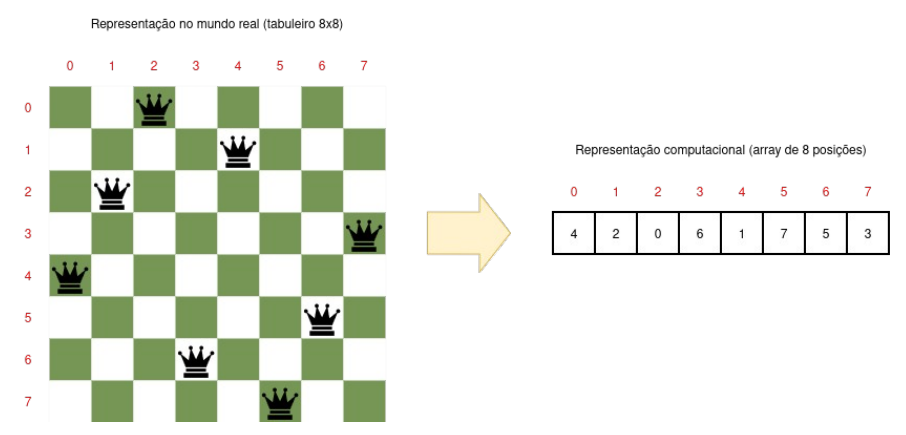

Faça os itens requisitados abaixo:

### a) Crie e explique um fluxograma que descreva uma busca arbitrária, considerando uma função objetivo que minimize o número de colisões entre as rainhas, e que o critério de parada seja um número máximo de movimentos sem melhorias no fitness de 500 iterações.

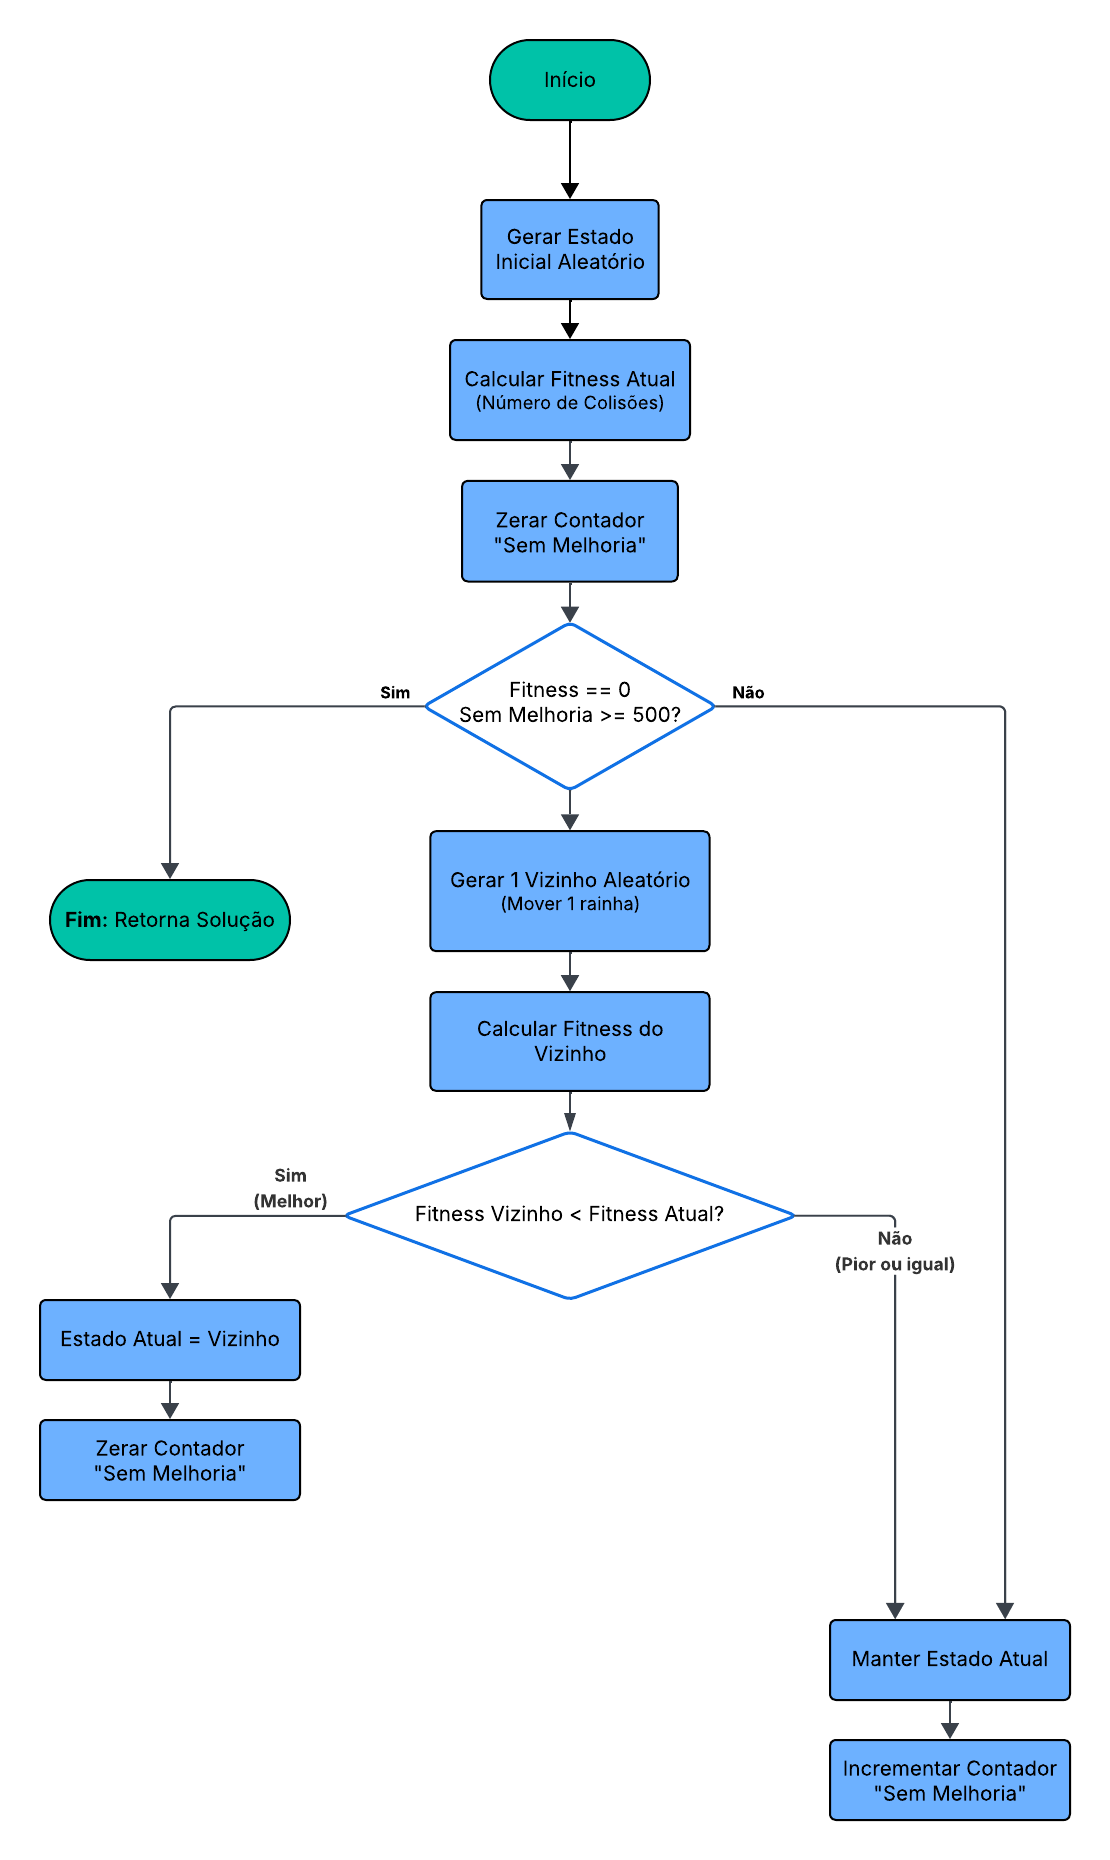

**Explicação do Fluxograma – Stochastic Hill Climbing (First-Choice)**

O fluxograma descreve o funcionamento do algoritmo Stochastic Hill Climbing, aplicado ao problema das N-Rainhas. O algoritmo segue a abordagem de Busca Local, na qual apenas um estado é mantido na memória e sucessores são gerados de forma incremental.

Inicialmente, o algoritmo gera um estado inicial aleatório, que representa uma possível configuração do tabuleiro com as rainhas posicionadas. Em seguida, é calculado o fitness do estado atual, definido como o número total de colisões entre as rainhas. Quanto menor esse valor, melhor a solução, sendo o valor zero correspondente a uma solução válida do problema.

Após essa etapa, o contador de tentativas sem melhoria é inicializado com valor zero. Esse contador é utilizado como critério de parada para evitar que o algoritmo fique preso indefinidamente em regiões do espaço de busca onde não há progresso.

O algoritmo então entra em um laço de repetição, no qual são verificadas duas condições de parada:

1. Se o fitness do estado atual é igual a zero, indicando que uma solução válida foi encontrada.

2. Se o número de iterações sem melhoria atingiu um limite predefinido (500 tentativas), indicando estagnação da busca.

Caso nenhuma dessas condições seja satisfeita, o algoritmo gera um único vizinho aleatório, obtido ao mover uma rainha para outra posição válida no tabuleiro. Em seguida, é calculado o fitness desse estado vizinho.

Se o fitness do vizinho for estritamente menor que o fitness do estado atual, o algoritmo aceita essa nova configuração como o estado atual, caracterizando uma melhoria. Nesse caso, o contador de tentativas sem melhoria é reiniciado. Caso contrário, o estado atual é mantido e o contador de tentativas sem melhoria é incrementado.

Esse processo se repete até que uma solução seja encontrada ou que o critério de parada por estagnação seja atingido. Ao final da execução, o algoritmo retorna o melhor estado encontrado, encerrando o fluxo.

Esse comportamento reflete a principal característica do First-choice hill climbing, no qual sucessores são gerados aleatoriamente e aceitos assim que uma melhoria é encontrada, sem a necessidade de avaliar toda a vizinhança do estado atual, tornando o algoritmo mais simples e computacionalmente eficiente.

### b) Execute o algoritmo 50 vezes e calcule: média e desvio padrão do número mínimo de iterações necessário para parar o algoritmo; média e desvio padrão do tempo de execução do algoritmo.

In [ ]:
import random
import time
import statistics

N_RAINHAS = 8
MAX_SEM_MELHORIA = 500  # Critério de parada do enunciado
NUM_EXECUCOES = 50      # Quantidade de execuções pedida no enunciado

def gerar_estado_aleatorio():
    """
    Gera um array de 8 posições onde o índice é a coluna
    e o valor é a linha (0-7).
    """
    return [random.randint(0, N_RAINHAS - 1) for _ in range(N_RAINHAS)]

def calcular_colisoes(estado):
    """
    Função Objetivo: Minimizar o número de colisões.
    Verifica ataques na mesma linha e nas diagonais.
    (Colunas já são distintas pelo índice do array).
    """
    colisoes = 0
    n = len(estado)
    for i in range(n):
        for j in range(i + 1, n):
            # Verifica ataque na mesma linha
            if estado[i] == estado[j]:
                colisoes += 1
            # Verifica ataque nas diagonais (|linha1 - linha2| == |col1 - col2|)
            elif abs(estado[i] - estado[j]) == abs(i - j):
                colisoes += 1
    return colisoes

def obter_vizinho(estado):
    """
    Gera um vizinho movendo uma rainha de uma coluna aleatória
    para uma nova linha aleatória.
    """
    vizinho = state = list(estado)
    coluna = random.randint(0, N_RAINHAS - 1)
    nova_linha = random.randint(0, N_RAINHAS - 1)

    # Garante que a rainha mude de posição
    while nova_linha == estado[coluna]:
        nova_linha = random.randint(0, N_RAINHAS - 1)

    vizinho[coluna] = nova_linha
    return vizinho

def stochastic_hill_climbing():
    """
    Implementa o Stochastic Hill Climbing conforme Questão 1.
    Retorna: (melhor_estado, colisoes_finais, iteracoes_totais, tempo_execucao)
    """
    inicio_tempo = time.time()

    atual = gerar_estado_aleatorio()
    colisoes_atual = calcular_colisoes(atual)

    melhor_estado = list(atual)
    menor_colisao = colisoes_atual

    iteracoes = 0
    sem_melhoria = 0

    # Loop continua enquanto não estourar a "paciência" de 500 iterações
    # E enquanto não achar a solução ótima (0 colisões)
    while sem_melhoria < MAX_SEM_MELHORIA and menor_colisao > 0:
        iteracoes += 1

        # Gera um vizinho aleatório (Stochastic)
        vizinho = obter_vizinho(atual)
        colisoes_vizinho = calcular_colisoes(vizinho)

        # Se o vizinho é estritamente melhor, movemos para ele
        if colisoes_vizinho < colisoes_atual:
            atual = vizinho
            colisoes_atual = colisoes_vizinho
            sem_melhoria = 0  # Reseta a contagem pois houve melhoria
        else:
            sem_melhoria += 1 # Não houve melhoria

        # Mantém registro do melhor absoluto encontrado nesta execução
        if colisoes_atual < menor_colisao:
            menor_colisao = colisoes_atual
            melhor_estado = list(atual)

    fim_tempo = time.time()
    tempo_total = fim_tempo - inicio_tempo

    return melhor_estado, menor_colisao, iteracoes, tempo_total

def main():
    print(f"--- Iniciando {NUM_EXECUCOES} execuções do Stochastic Hill Climbing ---")

    resultados_iteracoes = []
    resultados_tempos = []
    todas_solucoes = [] # Tuplas (colisoes, estado)

    # Item 1.b: Executar 50 vezes
    for i in range(NUM_EXECUCOES):
        estado, colisao, iters, tempo = stochastic_hill_climbing()

        resultados_iteracoes.append(iters)
        resultados_tempos.append(tempo)
        todas_solucoes.append((colisao, estado))

    # --- CÁLCULOS ESTATÍSTICOS (Item 1.b) ---
    media_iter = statistics.mean(resultados_iteracoes)
    stdev_iter = statistics.stdev(resultados_iteracoes)

    media_tempo = statistics.mean(resultados_tempos)
    stdev_tempo = statistics.stdev(resultados_tempos)

    print("\nResultados Estatísticos[cite: 48, 49]:")
    print(f"Iterações - Média: {media_iter:.2f}, Desvio Padrão: {stdev_iter:.2f}")
    print(f"Tempo (s) - Média: {media_tempo:.6f}, Desvio Padrão: {stdev_tempo:.6f}")

    # --- FILTRAR MELHORES SOLUÇÕES (Item 1.c) ---
    # Ordena por menor número de colisões (fitness)
    todas_solucoes.sort(key=lambda x: x[0])

    # Filtra para obter apenas soluções distintas (listas não hasháveis, convertemos para tupla)
    solucoes_unicas = []
    vistos = set()

    for colisao, estado in todas_solucoes:
        estado_tuple = tuple(estado)
        if estado_tuple not in vistos:
            vistos.add(estado_tuple)
            solucoes_unicas.append((colisao, estado))

    print(f"\nTop 5 Melhores Soluções Distintas Encontradas:")
    for i, (colisao, estado) in enumerate(solucoes_unicas[:5]):
        status = "SOLUÇÃO ÓTIMA" if colisao == 0 else f"Colisões: {colisao}"
        print(f"{i+1}. {estado} -> {status}")

if __name__ == "__main__":
    main()

--- Iniciando 50 execuções do Stochastic Hill Climbing ---

Resultados Estatísticos[cite: 48, 49]:
Iterações - Média: 453.12, Desvio Padrão: 214.57
Tempo (s) - Média: 0.005300, Desvio Padrão: 0.002673

Top 5 Melhores Soluções Distintas Encontradas[cite: 50]:
1. [4, 1, 3, 6, 2, 7, 5, 0] -> SOLUÇÃO ÓTIMA
2. [3, 6, 0, 7, 4, 1, 5, 2] -> SOLUÇÃO ÓTIMA
3. [4, 1, 7, 0, 3, 6, 2, 5] -> SOLUÇÃO ÓTIMA
4. [5, 0, 4, 1, 7, 2, 6, 3] -> SOLUÇÃO ÓTIMA
5. [5, 1, 6, 0, 2, 4, 7, 3] -> SOLUÇÃO ÓTIMA


**Resposta:**

Abaixo estão os dados estatísticos obtidos após as 50 execuções independentes do algoritmo desenvolvido:

| **Métrica** | **Média** | **Desvio Padrão** |
| --- | --- | --- |
| **Iterações até parar** | 453.12 | 214.57 |
| **Tempo de Execução (s)** | 0.005300 | 0.002673 |

**Análise:**

Observa-se que a média de iterações (453.12) ficou próxima ao limite de parada estabelecido (500 movimentos sem melhoria), o que é esperado para o *Stochastic Hill Climbing* simples, dado que ele frequentemente alcança ótimos locais e gasta o "orçamento" de iterações tentando sair deles sem sucesso. O tempo de execução, contudo, manteve-se muito baixo (frações de segundo), demonstrando a leveza computacional do algoritmo.

### c) Mostre as cinco melhores soluções distintas encontradas pelo algoritmo.

**Resposta:**

As soluções abaixo representam as 5 melhores configurações de tabuleiro distintas encontradas nas 50 execuções. O algoritmo obteve sucesso em encontrar soluções ótimas (fitness = 0, ou seja, zero colisões) em múltiplos casos.

1. **Estado:** `[4, 1, 3, 6, 2, 7, 5, 0]` $\rightarrow$ **SOLUÇÃO ÓTIMA** (0 Colisões)
2. **Estado:** `[3, 6, 0, 7, 4, 1, 5, 2]` $\rightarrow$ **SOLUÇÃO ÓTIMA** (0 Colisões)
3. **Estado:** `[4, 1, 7, 0, 3, 6, 2, 5]` $\rightarrow$ **SOLUÇÃO ÓTIMA** (0 Colisões)
4. **Estado:** `[5, 0, 4, 1, 7, 2, 6, 3]` $\rightarrow$ **SOLUÇÃO ÓTIMA** (0 Colisões)
5. **Estado:** `[5, 1, 6, 0, 2, 4, 7, 3]` $\rightarrow$ **SOLUÇÃO ÓTIMA** (0 Colisões)

*A representação do vetor segue o formato `[coluna 0, coluna 1, ..., coluna 7]`, onde o valor indica a linha ocupada pela rainha.*

---

---
## Segunda Questão
Desenvolva um algoritmo genético, em uma linguagem de programação de sua escolha, para resolver o problema das oito rainhas descrito na questão anterior. Utilize obrigatoriamente a codificação binária para representar um indivíduo. Os parâmetros desse algoritmo genético devem ser:
- Tamanho da população: 20.
- Seleção dos pais: estratégia da roleta.
- Cruzamento: estratégia do ponto de corte.
- Taxa de cruzamento: 80%.
- Mutação: estratégia do bit flip.
- Taxa de mutação: 3%.
- Seleção de sobreviventes: elitista (os melhores indivíduos sempre sobrevivem).
- Critérios de parada:
  - Número máximo de gerações alcançado: 1000.
  - Se a solução ótima for encontrada.

Faça os itens requisitados abaixo:

### a) Crie e explique um fluxograma que descreva uma busca arbitrária, considerando uma função objetivo que minimize o número de colisões entre as rainhas.

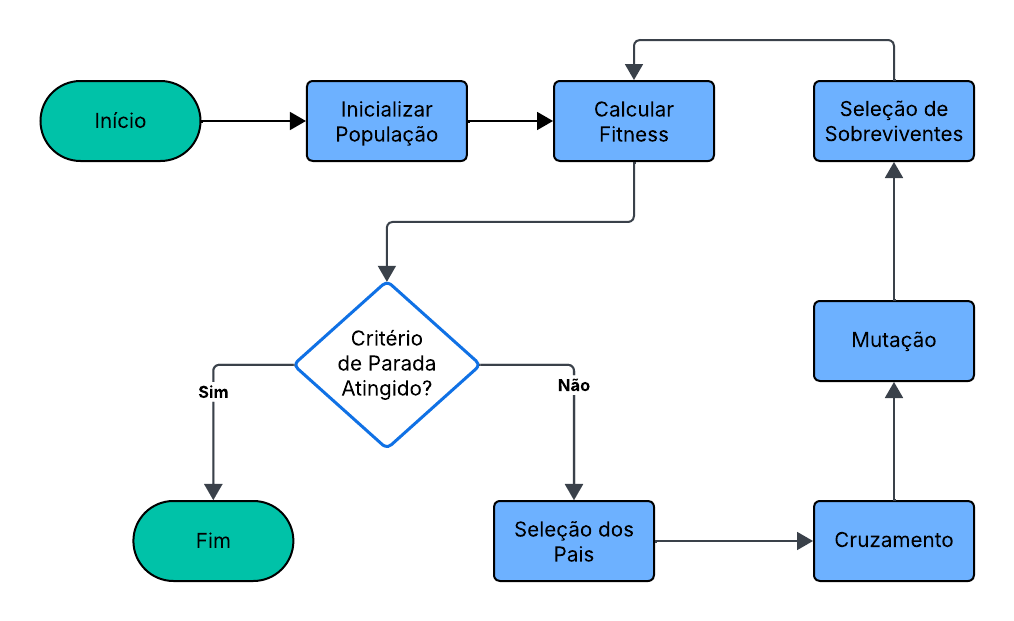

O algoritmo gera uma população inicial de 20 indivíduos com codificação binária. Depois, ocorre a decodificação dos cromossomos e o cálculo do número de colisões de cada indivíduo. Então, é verificado se um dos critérios de parada foi atingido (número de gerações chegar a 1000 ou algum indivíduo possuir 0 colisões).
- Se sim, o algoritmo é finalizado.
- Se não, o método da roleta seleciona pares de pais, é aplicado o ponto de corte com taxa de 80%, usa-se o bit flip com taxa de 3% nos filhos gerados, e é utilizado o Elitismo para manter o melhor e é formada uma nova população. O contador de gerações é então incrementado. Isso se repete até que um dos critérios de parada seja atingido.

### b) Execute o algoritmo 50 vezes e calcule: média e desvio padrão do número mínimo de iterações necessário para parar o algoritmo; média e desvio padrão do tempo de execução do algortimo.

In [ ]:
#Imports (executar primeiro)
import random
import time
import statistics
import math

In [ ]:
class AlgoritmoRainhas:
  def __init__(self, tamanho_populacao=20, taxa_cruzamento=0.8, taxa_mutacao=0.03, maximo_geracoes=1000):
    self.tamanho_populacao = tamanho_populacao
    self.taxa_cruzamento = taxa_cruzamento
    self.taxa_mutacao = taxa_mutacao
    self.maximo_geracoes = maximo_geracoes
    self.tamanho_cromossomo = 8 * 3

  def cromossomo_aleatorio(self):
    return [random.randint(0, 1) for _ in range(self.tamanho_cromossomo)]

  def decodificar(self, cromossomo):
    rainhas = []
    for i in range(0, self.tamanho_cromossomo, 3):
      bits = cromossomo[i:i+3]
      valor = 0
      for bit in bits:
        valor = (valor << 1) | bit
      rainhas.append(valor)
    return rainhas

  def calcular_colisoes(self, rainhas):
    colisoes = 0
    n = len(rainhas)
    for i in range(n):
      for j in range(i + 1, n):
        if rainhas[i] == rainhas[j]:
          colisoes += 1
        elif abs(rainhas[i] - rainhas[j]) == abs(i - j):
          colisoes += 1
    return colisoes

  def fitness(self, cromossomo):
    rainhas = self.decodificar(cromossomo)
    colisoes = self.calcular_colisoes(rainhas)
    return 28 - colisoes

  def selecao_roleta(self, populacao, fitnesses):
    total_fitness = sum(fitnesses)
    if total_fitness == 0:
      return random.choice(populacao)

    selecionado = random.uniform(0, total_fitness)
    atual = 0
    for i, ind in enumerate(populacao):
      atual += fitnesses[i]
      if atual > selecionado:
        return ind
    return populacao[-1]

  def cruzamento(self, pai1, pai2):
    if random.random() < self.taxa_cruzamento:
      ponto_corte = random.randint(1, self.tamanho_cromossomo - 1)
      filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
      filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
      return filho1, filho2
    return pai1[:], pai2[:]

  def mutacao(self, cromossomo):
    for i in range(len(cromossomo)):
      if random.random() < self.taxa_mutacao:
        cromossomo[i] = 1 - cromossomo[i]
    return cromossomo

  def executar(self):
    inicio = time.time()
    populacao = [self.cromossomo_aleatorio() for _ in range(self.tamanho_populacao)]
    melhor_solucao = None
    menor_colisoes = float('inf')
    geracoes = 0

    for geracao in range(1, self.maximo_geracoes + 1):
      geracoes = geracao
      valores_fitness = [self.fitness(ind) for ind in populacao]

      for i, fit in enumerate(valores_fitness):
        colisoes = 28 - fit
        if colisoes < menor_colisoes:
          menor_colisoes = colisoes
          melhor_solucao = populacao[i]

      if menor_colisoes == 0:
        break

      nova_populacao = []
      best_idx = valores_fitness.index(max(valores_fitness))
      nova_populacao.append(populacao[best_idx][:])

      while len(nova_populacao) < self.tamanho_populacao:
        p1 = self.selecao_roleta(populacao, valores_fitness)
        p2 = self.selecao_roleta(populacao, valores_fitness)
        c1, c2 = self.cruzamento(p1, p2)
        c1 = self.mutacao(c1)
        c2 = self.mutacao(c2)

        nova_populacao.append(c1)
        if len(nova_populacao) < self.tamanho_populacao:
          nova_populacao.append(c2)

      populacao = nova_populacao

    fim = time.time()
    tempo_execucao = fim - inicio

    return geracoes, tempo_execucao, menor_colisoes

lista_iteracoes = []
lista_tempo = []
sucessos = 0
alg_rainhas = AlgoritmoRainhas()

print("---------- EXECUTANDO ALGORITMO ----------")
for i in range(50):
  iteracoes, tempo, colisoes = alg_rainhas.executar()
  lista_iteracoes.append(iteracoes)
  lista_tempo.append(tempo)
  if colisoes == 0:
    sucessos += 1

iteracoes_media = statistics.mean(lista_iteracoes)
desvio_padrao_iteracoes = statistics.stdev(lista_iteracoes)
tempo_medio = statistics.mean(lista_tempo)
desvio_padrao_tempo = statistics.stdev(lista_tempo)

print("\nResultados:")
print(f"Número de sucessos: {sucessos}/50")
print(f"Média de iterações: {iteracoes_media:.2f}")
print(f"Desvio padrão de iterações: {desvio_padrao_iteracoes:.2f}")
print(f"Média de tempo: {tempo_medio:.4f}")
print(f"Desvio padrão de tempo: {desvio_padrao_tempo:.4f}")

---------- EXECUTANDO ALGORITMO ----------

Resultados:
Número de sucessos: 22/50
Média de iterações: 659.04
Desvio padrão de iterações: 415.30
Média de tempo: 0.1532
Desvio padrão de tempo: 0.0993


### c) Mostre as cinco melhores soluções distintas encontradas pelo algoritmo.

In [ ]:
class AlgoritmoRainhas:
  def __init__(self, tamanho_populacao=20, taxa_cruzamento=0.8, taxa_mutacao=0.03, maximo_geracoes=1000):
    self.tamanho_populacao = tamanho_populacao
    self.taxa_cruzamento = taxa_cruzamento
    self.taxa_mutacao = taxa_mutacao
    self.maximo_geracoes = maximo_geracoes
    self.tamanho_cromossomo = 8 * 3

  def cromossomo_aleatorio(self):
    return [random.randint(0, 1) for _ in range(self.tamanho_cromossomo)]

  def decodificar(self, cromossomo):
    rainhas = []
    for i in range(0, self.tamanho_cromossomo, 3):
      bits = cromossomo[i:i+3]
      valor = 0
      for bit in bits:
        valor = (valor << 1) | bit
      rainhas.append(valor)
    return rainhas

  def calcular_colisoes(self, rainhas):
    colisoes = 0
    n = len(rainhas)
    for i in range(n):
      for j in range(i + 1, n):
        if rainhas[i] == rainhas[j]:
          colisoes += 1
        elif abs(rainhas[i] - rainhas[j]) == abs(i - j):
          colisoes += 1
    return colisoes

  def fitness(self, cromossomo):
    rainhas = self.decodificar(cromossomo)
    colisoes = self.calcular_colisoes(rainhas)
    return 28 - colisoes

  def selecao_roleta(self, populacao, fitnesses):
    total_fitness = sum(fitnesses)
    if total_fitness == 0:
      return random.choice(populacao)

    selecionado = random.uniform(0, total_fitness)
    atual = 0
    for i, ind in enumerate(populacao):
      atual += fitnesses[i]
      if atual > selecionado:
        return ind
    return populacao[-1]

  def cruzamento(self, pai1, pai2):
    if random.random() < self.taxa_cruzamento:
      ponto_corte = random.randint(1, self.tamanho_cromossomo - 1)
      filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
      filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
      return filho1, filho2
    return pai1[:], pai2[:]

  def mutacao(self, cromossomo):
    for i in range(len(cromossomo)):
      if random.random() < self.taxa_mutacao:
        cromossomo[i] = 1 - cromossomo[i]
    return cromossomo

  def executar(self):
    inicio = time.time()
    populacao = [self.cromossomo_aleatorio() for _ in range(self.tamanho_populacao)]
    melhor_solucao = None
    menor_colisoes = float('inf')
    geracoes = 0

    for geracao in range(1, self.maximo_geracoes + 1):
      geracoes = geracao
      valores_fitness = [self.fitness(ind) for ind in populacao]

      for i, fit in enumerate(valores_fitness):
        colisoes = 28 - fit
        if colisoes < menor_colisoes:
          menor_colisoes = colisoes
          melhor_solucao = populacao[i]

      if menor_colisoes == 0:
        break

      nova_populacao = []
      best_idx = valores_fitness.index(max(valores_fitness))
      nova_populacao.append(populacao[best_idx][:])

      while len(nova_populacao) < self.tamanho_populacao:
        p1 = self.selecao_roleta(populacao, valores_fitness)
        p2 = self.selecao_roleta(populacao, valores_fitness)
        c1, c2 = self.cruzamento(p1, p2)
        c1 = self.mutacao(c1)
        c2 = self.mutacao(c2)

        nova_populacao.append(c1)
        if len(nova_populacao) < self.tamanho_populacao:
          nova_populacao.append(c2)

      populacao = nova_populacao

    fim = time.time()
    tempo_execucao = fim - inicio

    return melhor_solucao, menor_colisoes

solucoes = []
alg_rainhas = AlgoritmoRainhas()

tentativas = 0
while len(solucoes) < 5 and tentativas < 100:
  sol, col = alg_rainhas.executar()
  sol_decodificada = tuple(alg_rainhas.decodificar(sol))
  if not any(s['solucao'] == sol_decodificada for s in solucoes):
    solucoes.append({'solucao': sol_decodificada, 'colisoes': col})
  tentativas += 1

solucoes.sort(key=lambda x: x['colisoes'])
top_5_solucoes = solucoes[:5]

print("Top 5 Soluções Encontradas:")
for index, item in enumerate(top_5_solucoes):
  print(f"Solução {index + 1}: {list(item['solucao'])} | Colisões: {item['colisoes']}")

Top 5 Soluções Encontradas:
Solução 1: [3, 1, 4, 7, 5, 0, 2, 6] | Colisões: 0
Solução 2: [6, 3, 1, 7, 5, 0, 2, 4] | Colisões: 0
Solução 3: [3, 6, 2, 7, 1, 4, 0, 5] | Colisões: 0
Solução 4: [4, 0, 3, 5, 7, 1, 6, 2] | Colisões: 0
Solução 5: [7, 5, 2, 0, 6, 4, 7, 1] | Colisões: 1
